## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.signal import medfilt,butter,filtfilt
sns.set()

In [2]:
path = '/content/drive/My Drive/'
file = 'SCADA_data_WT2339.csv'

In [3]:
data = pd.read_csv(path+file)
data.head()

,id,ld_id,date_time,fake_data,NumSampleTenMinBin,AcumGralPala1Mean,AcumGralPala1Sdev,AcumGralPala1Min,AcumGralPala1Max,AcumGralPala2Mean,AcumGralPala2Sdev,AcumGralPala2Min,AcumGralPala2Max,AcumGralPala3Mean,AcumGralPala3Sdev,AcumGralPala3Min,AcumGralPala3Max,AutopilotoCalc,CmdWTGMean,CmdWTGSdev,CmdWTGMin,CmdWTGMax,ConfirmContractGiroCCWMean,ConfirmContractGiroCCWSdev,ConfirmContractGiroCCWMin,ConfirmContractGiroCCWMax,ConfirmContractGiroCWMean,ConfirmContractGiroCWSdev,ConfirmContractGiroCWMin,ConfirmContractGiroCWMax,ContEnerActivaMean,ContEnerActivaSdev,ContEnerActivaMin,ContEnerActivaMax,CosPhiMean,CosPhiSdev,CosPhiMin,CosPhiMax,Diag1_R4Mean,Diag1_R4Sdev,...,TempRodamTraseroMin,TempRodamTraseroMax,TempTrafo1Mean,TempEjeLento_2,TempEjeLento_1,TempTrafo1Sdev,TempTrafo1Min,TempTrafo1Max,TempTrafo2Mean,TempTrafo2Sdev,TempTrafo2Min,TempTrafo2Max,TempTrafo3Mean,TempTrafo3Sdev,TempTrafo3Min,TempTrafo3Max,TensRedMean,TensRedSdev,TensRedMin,TensRedMax,TotPotReactMean,TotPotReactSdev,TotPotReactMin,TotPotReactMax,VelGenMean,VelGenSdev,VelGenMin,VelGenMax,VelRotorMean,VelRotorSdev,VelRotorMin,VelRotorMax,VelVientoMean,VelVientoSdev,VelVientoMin,VelVientoMax,YawMean,YawSdev,YawMin,YawMax
0,7735936,2339,2013-01-01 00:00:00.0,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7735937,2339,2013-01-01 00:10:00.0,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7735938,2339,2013-01-01 00:20:00.0,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7735939,2339,2013-01-01 00:30:00.0,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7735940,2339,2013-01-01 00:40:00.0,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns = data.columns.to_list()
mean_columns = []
for column in columns:
    if 'Mean' in column:
        mean_columns.append(column)
mean_columns.insert(0, 'date_time')
mean_columns.insert(2,'TempEjeLento_1')
mean_columns.insert(0, 'ld_id')
print('Size filter dataset: ',len(mean_columns))
print(mean_columns)

Size filter dataset:  45
['ld_id', 'date_time', 'AcumGralPala1Mean', 'TempEjeLento_1', 'AcumGralPala2Mean', 'AcumGralPala3Mean', 'CmdWTGMean', 'ConfirmContractGiroCCWMean', 'ConfirmContractGiroCWMean', 'ContEnerActivaMean', 'CosPhiMean', 'Diag1_R4Mean', 'FrecRedMean', 'IndTurbulMean', 'NivOscilMean', 'NivVibraMean', 'Pitch1Mean', 'Pitch2Mean', 'Pitch3Mean', 'PotMean', 'PresAcumGralMean', 'PresFrenoMean', 'PresGHMean', 'SPCosPhiMean', 'SPPitchMean', 'TempAceiteGHMean', 'TempAceiteMultipMean', 'TempAmbMean', 'TempCojLAMean', 'TempCojLOAMean', 'TempGenMean', 'TempGondMean', 'TempRadInfMean', 'TempRadSupMean', 'TempRodamMultipMean', 'TempRodamTraseroMean', 'TempTrafo1Mean', 'TempTrafo2Mean', 'TempTrafo3Mean', 'TensRedMean', 'TotPotReactMean', 'VelGenMean', 'VelRotorMean', 'VelVientoMean', 'YawMean']


In [5]:
data_mean = data[mean_columns]
data_mean.head()

,ld_id,date_time,AcumGralPala1Mean,TempEjeLento_1,AcumGralPala2Mean,AcumGralPala3Mean,CmdWTGMean,ConfirmContractGiroCCWMean,ConfirmContractGiroCWMean,ContEnerActivaMean,CosPhiMean,Diag1_R4Mean,FrecRedMean,IndTurbulMean,NivOscilMean,NivVibraMean,Pitch1Mean,Pitch2Mean,Pitch3Mean,PotMean,PresAcumGralMean,PresFrenoMean,PresGHMean,SPCosPhiMean,SPPitchMean,TempAceiteGHMean,TempAceiteMultipMean,TempAmbMean,TempCojLAMean,TempCojLOAMean,TempGenMean,TempGondMean,TempRadInfMean,TempRadSupMean,TempRodamMultipMean,TempRodamTraseroMean,TempTrafo1Mean,TempTrafo2Mean,TempTrafo3Mean,TensRedMean,TotPotReactMean,VelGenMean,VelRotorMean,VelVientoMean,YawMean
0,2339,2013-01-01 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2339,2013-01-01 00:10:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2339,2013-01-01 00:20:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2339,2013-01-01 00:30:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2339,2013-01-01 00:40:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_before = data_mean[(data_mean['date_time'] < '2017-12-21')]

In [7]:
data_after = data_mean[(data_mean['date_time'] > '2017-12-21')]

In [8]:
def process_data(data):
    data_interpolate = data.interpolate()
    b, a = butter(3,Wn=0.1,btype='low', analog=False)
    data_lowpass = filtfilt(b, a, data)
    return data_interpolate, medfilt(data_interpolate,kernel_size=51),data_lowpass

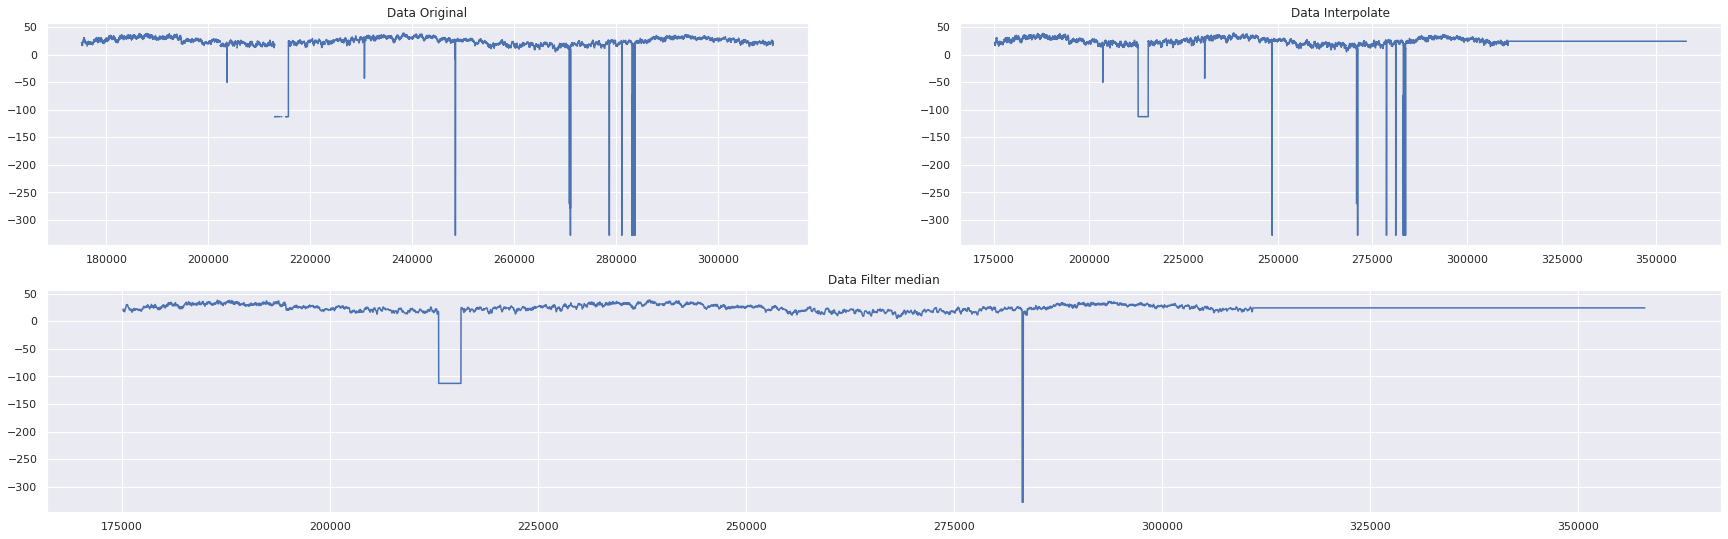

In [9]:
data_interpolate, data_outlier,data_lowpass = process_data(data['TempEjeLento_1'])
plt.figure(figsize=(30,9))

plt.subplot(221)
plt.plot(data['TempEjeLento_1'])
plt.title('Data Original')

plt.subplot(222)
plt.plot(data_interpolate)
plt.title('Data Interpolate')


plt.subplot(2,2,(3,4))
plt.plot(data_outlier)
plt.title('Data Filter median')


plt.show()

In [10]:
def remove_outliers(df):
    return df[np.abs(df-df.mean())<=(3*df.std())] 


In [11]:
def analysis(eje_before,eje_after):

    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.boxplot(eje_before)
    plt.legend()
    plt.title('Datos antes de fallos')

    plt.subplot(2,2,2)
    plt.boxplot(remove_outliers(eje_before))
    plt.title('Datos antes del fallo sin outliers')

    plt.subplot(2,2,3)
    plt.boxplot(eje_after)
    plt.title('Datos durante el Fallo')

    plt.subplot(2,2,4)
    plt.boxplot(remove_outliers(eje_after))
    plt.title('Datos durante el Fallo sin outliers')
    plt.show()
#-------------------------------------
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(eje_before,label='Original')
    plt.plot(remove_outliers(eje_before),label='Sin Outliers')
    plt.title('Antes del fallo')
    plt.legend()

    plt.subplot(212)
    plt.plot(eje_after,label='Original')
    plt.plot(remove_outliers(eje_after),label='Sin Outliers')
    plt.title('Durante el fallo')
    plt.legend()
    plt.show()
#---------------------------------------
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    remove_outliers(eje_before).hist()
    plt.title('Datos Antes')

    plt.subplot(122)
    remove_outliers(eje_after).hist()
    plt.title('Datos Durante')
    plt.tight_layout()
    plt.show()


No handles with labels found to put in legend.


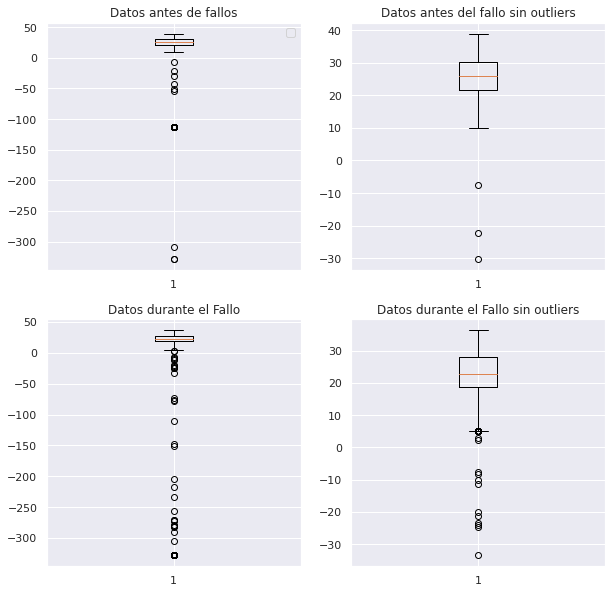

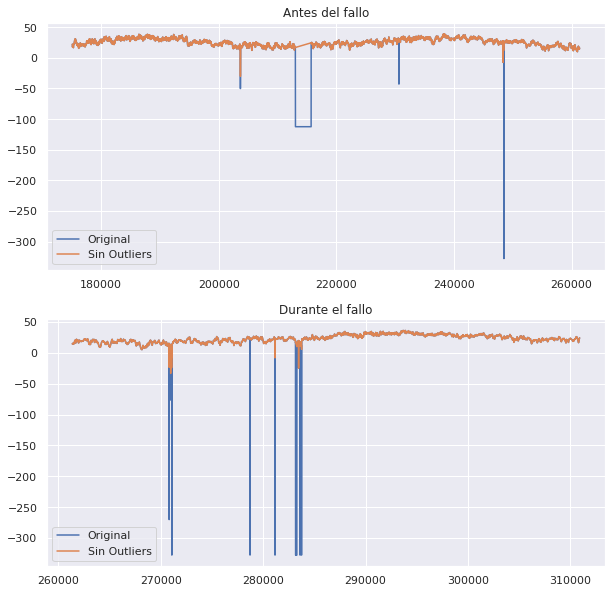

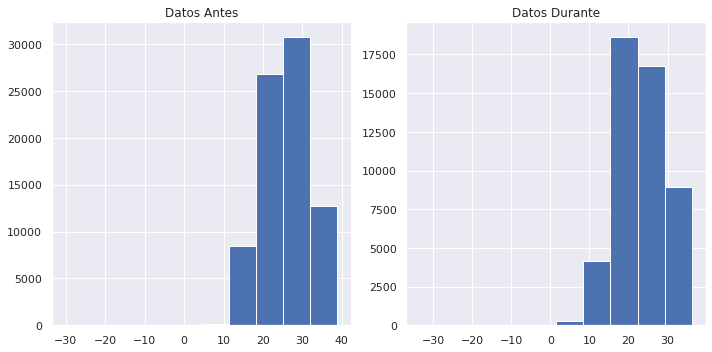

In [12]:
variable='TempEjeLento_1'
eje_before = data_before[variable].dropna()
eje_after = data_after[variable].dropna()
#eje_before = data_before['TempEjeLento_1'].dropna()
#eje_after = data_after['TempEjeLento_1'].dropna()
analysis(eje_before,eje_after)


## Analisis de datos originales

In [13]:
!pip install sweetviz
import sweetviz

     |████████████████████████████████| 327kB 3.3MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [14]:
data_correlation = data[['date_time','TempAmbMean','TempRodamMultipMean', 'TempCojLAMean', 'TempCojLOAMean', 'TempGenMean', 'TempEjeLento_1']].dropna()
data_correlation['TempRodamMultipMean'] = data_correlation['TempRodamMultipMean']-data_correlation['TempAmbMean']
data_correlation['TempCojLAMean'] = data_correlation['TempCojLAMean']-data_correlation['TempAmbMean']
data_correlation['TempCojLOAMean'] = data_correlation['TempCojLOAMean']-data_correlation['TempAmbMean']
data_correlation['TempGenMean'] = data_correlation['TempGenMean']-data_correlation['TempAmbMean']
data_correlation['TempEjeLento_1'] = data_correlation['TempEjeLento_1']-data_correlation['TempAmbMean']

data_cbefore = data_correlation[(data_correlation['date_time'] < '2017-12-21')].drop('date_time',axis=1)
data_cafter = data_correlation[(data_correlation['date_time'] > '2017-12-21')].drop('date_time',axis=1)

In [15]:
my_report=sweetviz.compare([data_cbefore,'Antes'],[data_cafter,'Durante'],target_feat='TempEjeLento_1')

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [16]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


No handles with labels found to put in legend.


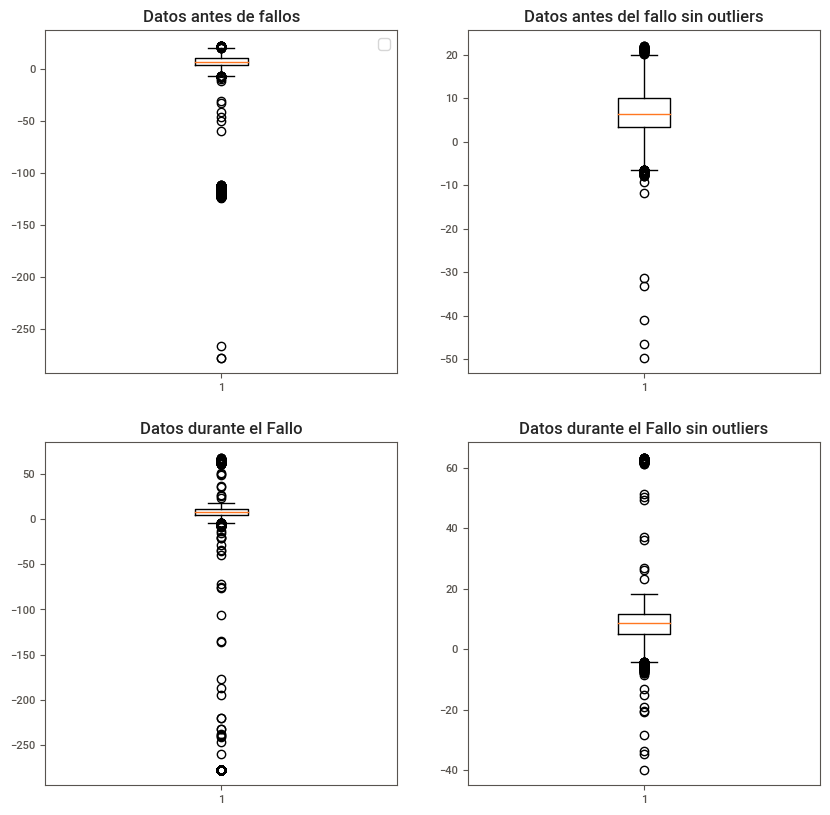

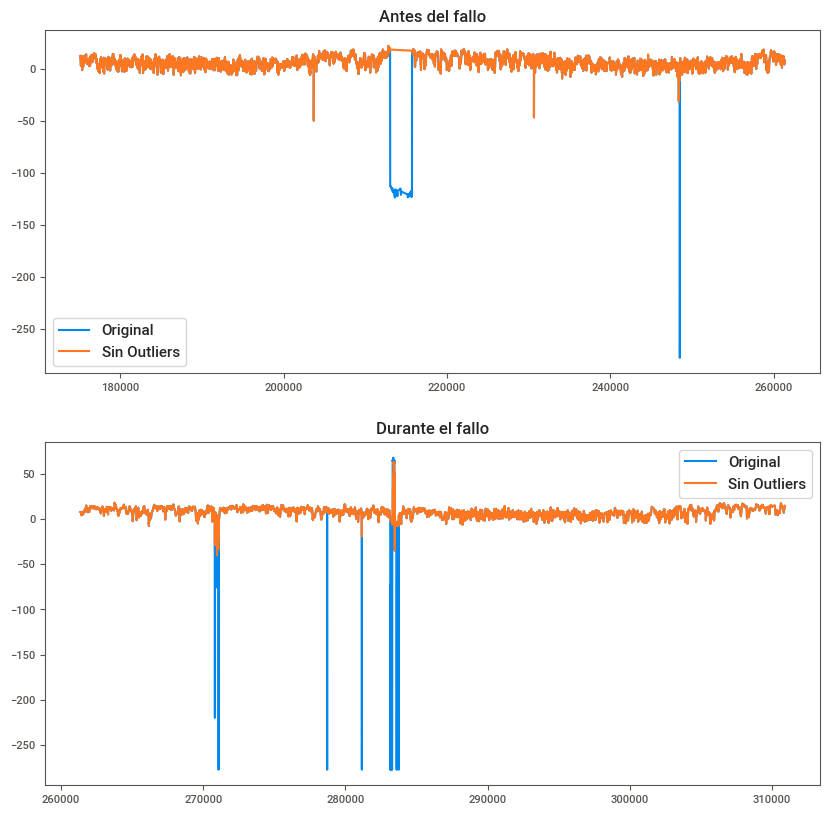

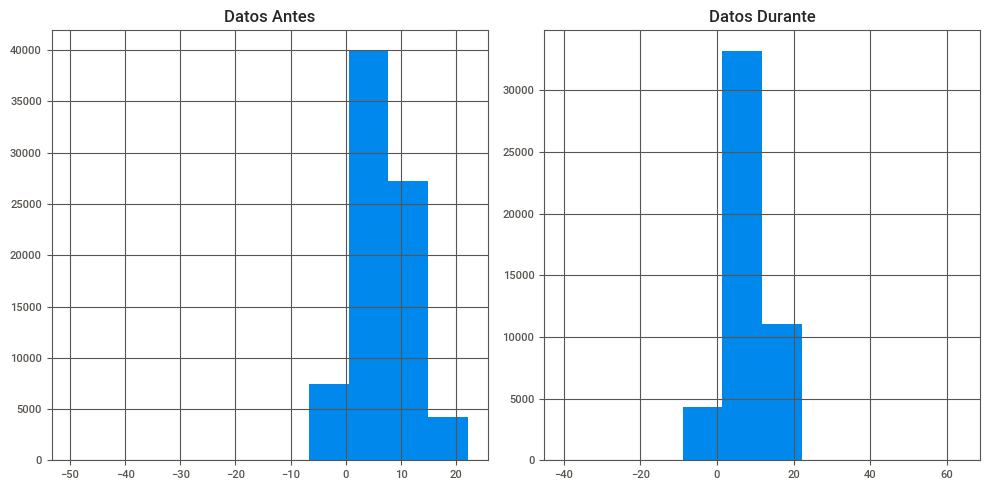

In [17]:
analysis(data_cbefore['TempEjeLento_1'],data_cafter['TempEjeLento_1'])